# UK Invasive Species - Harlequin ladybird

### This Notebook will lead you through exercises to explore occurrences of the invasive Harlequin ladybird (*Harmonia axyridis*) in the UK. 

In this notebook, you will:

$\bullet$ Learn how to use Jupyter Notebooks

$\bullet$ Learn how to read DarwinCore archive data files

$\bullet$ Learn how to use Pandas dataframes

$\bullet$ Learn how to display occurences on a map, as both points and density.

$\bullet$ Visualise the data against time in KeplerGL (https://kepler.gl/)



### If you have time and want to go further with your analysis:

$\bullet$ Map the distribution of *Harmonia axyridis* against an impacted native species, for example *Adalia bipunctata*.

## Jupyter Notebooks




Jupyter notebooks are a great way to write code, and especially for data science projects.

A notebook integrates code and its output into a single document that combines visualizations, narrative text, mathematical equations, and other rich media. The notebook consists of cells, which can be either code or markdown (text).

To execute python code in a cell, you "Run" it, by either pressing ```shift``` and ```enter``` keys, or using the run button at the top.

![](assets/run.png)

Let's try that out:






In [1]:
print("Welcome to the Informatics Data practical!")

Welcome to the Informatics Data practical!


## Module imports

Python modules are collections of python code, written and released by other users of python.  There's modules for all kinds of functions and uses, and for every branch of science. 

By convention python scripts start by importing all the modules they use at the top of the file.  

For this practical, the key modules we'll be using are:

$\bullet$ Pandas - data manipulation and analysis - we'll be using it as simple data table (https://pandas.pydata.org/)

$\bullet$ Geopandas - Adds geospatial functionality to Pandas data tables (https://geopandas.org/)

$\bullet$ Geoplot - Plotting data on maps (https://residentmario.github.io/geoplot/index.html)

$\bullet$ keplergl - data visualisation library (https://github.com/keplergl/kepler.gl)



In [2]:
### Python imports

import geopandas
import geoplot

# Map projections
import geoplot.crs as gcrs

from keplergl import KeplerGl
import matplotlib.pyplot as plt
import pandas as pd

import shapely

# Local imports - mapconfig for KeplerGL
from helpers import map_config

# Disable shapely speedups (fixes a bug when displaying some map data)
# shapely.speedups.disable()

# Display plots inline
%matplotlib inline


## Reading the DarwinCore occurrences data

The 71281 occurrences of *Harmonia axyridis* within the UK from GBIF have been included in this courses' repository.

https://github.com/benscott/biodiversity-informatics-101-data/tree/main/gbif_dwca

GBIF mints a DOI (Digital Object Identifier) for every dataset downloaded, a permanent citable link to the data.

The DOI for our data is https://doi.org/10.15468/dl.t7jqc2

So lets load this data into a Pandas DataFrame:



In [3]:
df = pd.read_csv('https://github.com/benscott/biodiversity-informatics-101-data/raw/main/gbif_dwca/occurrence.txt', sep='\t', low_memory=False)

After the data has been loaded (which might take a little while), we can have a look to see what we have.

Use the head() function to show the first few rows of the data.

In [4]:
df.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
0,3018108660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GBR,United Kingdom,GBR.1_1,England,GBR.1.59_1,Norfolk,GBR.1.59.5_1,Norwich
1,3018083239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GBR,United Kingdom,GBR.1_1,England,GBR.1.107_1,Warrington,GBR.1.107.1_1,Warrington
2,3018013148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GBR,United Kingdom,GBR.1_1,England,GBR.1.36_1,Greater London,GBR.1.36.28_1,Southwark
3,3017979960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GBR,United Kingdom,GBR.1_1,England,GBR.1.44_1,Kent,GBR.1.44.12_1,Tunbridge Wells
4,3017954486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GBR,United Kingdom,GBR.1_1,England,GBR.1.12_1,Bristol,GBR.1.12.1_1,Bristol


And shape to see the 'shape' - the number of rows and columns.

So we have 71281 records - matching the number of occurences we found - with 249 columns.

These column names match those in the DarwinCore data standard. https://dwc.tdwg.org/terms/

We can use Pandas to display the data for any of those DarwinCore terms - for example family - https://dwc.tdwg.org/list/#dwc_family.

The data display will be limted to just the first 5 and last 5 rows. Otherwise we'd have a very long list to scroll down, all showing the same family name "Coccinellidae")



In [5]:
df['family']

0        Coccinellidae
1        Coccinellidae
2        Coccinellidae
3        Coccinellidae
4        Coccinellidae
             ...      
71276    Coccinellidae
71277    Coccinellidae
71278    Coccinellidae
71279    Coccinellidae
71280    Coccinellidae
Name: family, Length: 71281, dtype: object

## Data Contributors

The DwC file also includes where the data originated from in the institutionCode field. In our dataset, we can see the main contributors were the Biological Records Center, and iNaturalist, another citizen science recording tool.

In [6]:
df.groupby(['institutionCode']).size().reset_index(name='counts').sort_values('counts', ascending=False)

,institutionCode,counts
4,Biological Records Centre,25366
35,iNaturalist,4192
28,SEWBReC,724
24,"Record, the Biodiversity Information System fo...",692
12,MBB,671
30,Suffolk Biodiversity Information Service,601
31,SxBRC,538
10,Lancashire Environment Record Network,530
2,BRERC,529
27,SEDN,402


## Histograms

Histograms show counts of records, so we can quickly see how many occurrences have been record for each year.



array([[<Axes: title={'center': 'year'}>]], dtype=object)

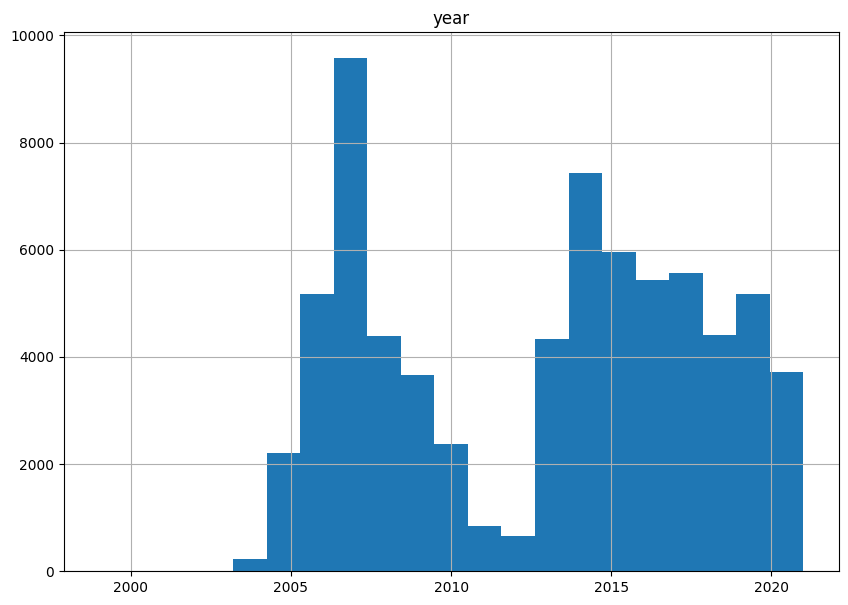

In [7]:
df.hist(column='year', bins=21, figsize=(10, 7))

Here we see the first Harlequin ladybird was spotted in 2004, followed by a huge explosion in numbers in subsequent years. 

## Mapping the data

The histogram only tells part of the story - we can see the numbers of Harlequin ladybirds increasing, but we can't see how the Harlequin has dispersed throughout the UK. 

For that, we need to explore the geospatial component of the data - map the occurrences over time. 

To do this, we'll transform the dataset into a GeoDataFrame. We only want a subset of the fields - latitude, longitude, along with the collection event date and year.

In [8]:

# Transform the dataset into geo dataframe
gdf = geopandas.GeoDataFrame(
    df[['eventDate', 'year']], geometry=geopandas.points_from_xy(df.decimalLongitude, df.decimalLatitude))



If we now take a look at the data in this new dataframe, we can see the three fields eventDate, year and geometry (latitude and longitude combined into a geometric point)

In [9]:
gdf.head()


,eventDate,year,geometry
0,2021-01-01T15:42:56,2021.0,POINT (1.27639 52.59166)
1,2021-01-07T18:31:59,2021.0,POINT (-2.59315 53.37924)
2,2020-10-20T14:05:56,2020.0,POINT (-0.04212 51.44873)
3,2020-09-05T10:16:00,2020.0,POINT (0.26804 51.14003)
4,2020-08-30T23:12:45,2020.0,POINT (-2.58433 51.46672)


Lets plot these points on a basic map of the UK (this takes a few moments to render):

/var/folders/vx/376w_qqn2wn3jk3tz_pvlf9h0000gp/T/ipykernel_60462/3494355097.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


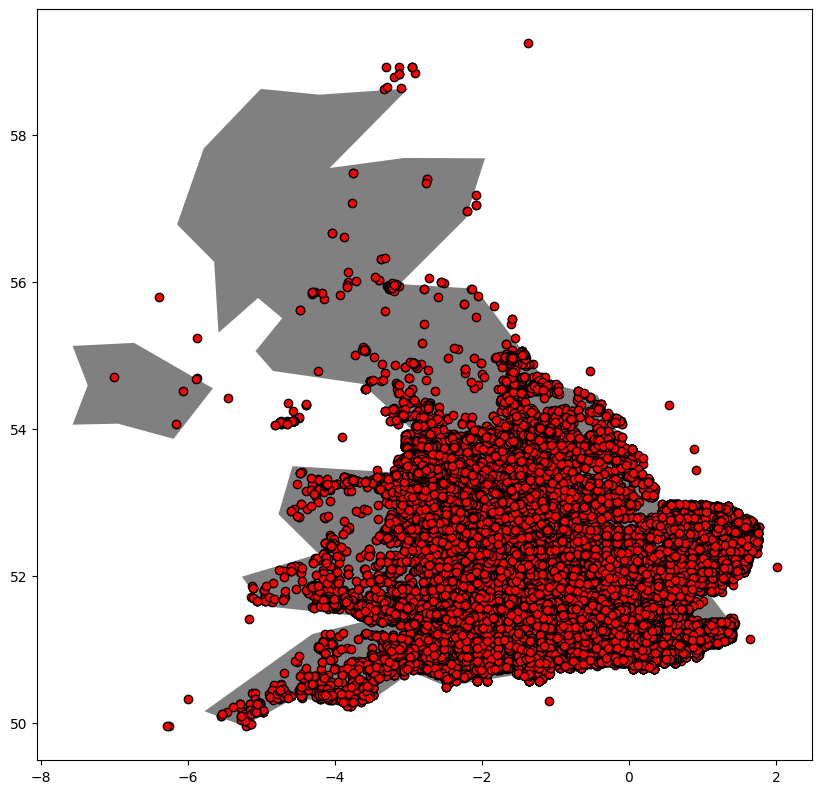

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
uk =  world[(world.name == "United Kingdom")]

ax = uk.plot(color='grey', figsize=(10, 10))

gdf.plot(ax=ax, color='red', edgecolor='k')

plt.show()

What a lot of ladybirds! But beyond that, it's not the most informative map.

We want to understand how the distribution of Harlequin Ladybirds have changed over time.  

For this, we can show the ladybirds for a particular year - 2004, the year the ladybirds arrived in the UK.  Rather than plotting the point of every occurrence, we'll plot the density as this gives a nicer indication of numbers. 

<GeoAxes: xlabel='None', ylabel='None'>

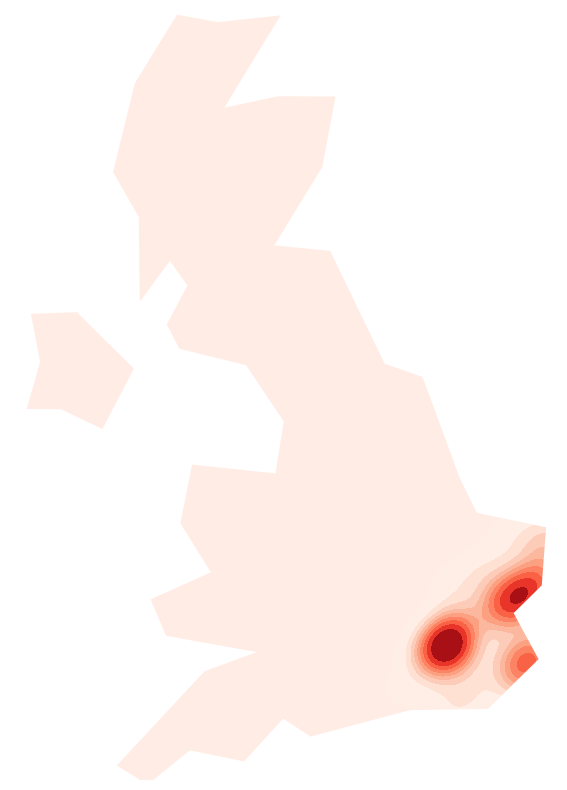

In [11]:
ax = geoplot.polyplot(uk, projection=gcrs.AlbersEqualArea(), figsize=(10, 10), color="#FFEDE5")

projection=gcrs.LambertConformal()


geoplot.kdeplot(
    df=gdf[gdf.year==2004], 
    projection=gcrs.LambertConformal(), 
    cmap='Reds', 
    fill=True, 
    thresh=0.05, 
    ax=ax, 
    extent=uk.total_bounds, 
    clip=uk
)

As you can see, in 2004 all the occurrences are clustered in the very South East of the UK. This supports the hypothesis that the intruduction of the species was wind-born from the continent. 

### Your turn: Can you make another map showing the occurrence density for 2010.

In [12]:
# Occurrence density map for 2010

## Animated Map

Comparing these maps shows the expansion of the Harlequin Ladybirds habitat over the years.  But we'd have an even clearer way of visulising this data if we could animate the changes over time.

For this, we're going to use the KeplerGL module (takes a little while to render)





In [13]:

KeplerGl(height=800, config=map_config, data={'occurrences': gdf[:]})


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/ben/Projects/Informatics101/.venv/lib/python3.10/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(config={'version': 'v1', 'option': {'readOnly': True}, 'config': {'visState': {'filters': [{'dataId':…

Kepler is an amazing library with lots of different options for visualisaing geospatial datasets.  

If you want to play around with it more, you can find it online at https://kepler.gl/. Included in the data repository is a simpler CSV with just geospatial and event date data that works well with KeplerGL. 

https://github.com/benscott/biodiversity-informatics-101-data/blob/main/kepler-occurrences.csv



